<a href="https://colab.research.google.com/github/rokset3/Safe-Primes-Remainder-Distribution/blob/main/Safe_Primes_Remainder_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wolframalpha

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
import requests as r
import wolframalpha

##Code for Small Primes

In [ ]:
#A list of first several Safe Primes from OEIS
safeprimes = np.array([5,7,11,23,47,59,83,107,167,179,227,263,347,359,383,467,479,503,563,587,719,839,863,887,983,1019,
 1187,1283,1307,1319,1367,1439,1487,1523,1619,1823, 1907,2027,2039,2063,2099,2207,2447,2459,2579,2819,2879,2903,2963])

In [ ]:
def clevpr1(p):
  #Determines a generator for a given safe prime number
  if p%8 == 3:
    return 2
  return -2

In [ ]:
def dist1(p):
  #Returns unordered list of remainders of (r^i + i) for all i < p
  count = []
  r = clevpr1(p)
  a = 1
  for i in range(1, p):
    a = a*r%p
    count.append(int((a + i)%p))
  return count

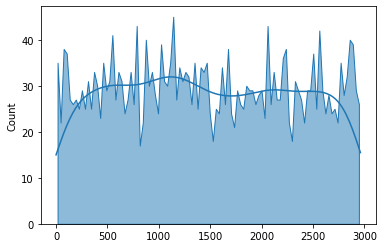

In [ ]:
t = -1
bins = min(safeprimes[t] - 1, 100)
kde = True
element = "poly"

sns.histplot(dist1(safeprimes[t]),
            bins=bins,
            kde=kde,
            element=element)

##Code for Large Safe primes

In [ ]:
def clevpr(p):
    #https://number.subwiki.org/wiki/Safe_prime_has_plus_or_minus_two_as_a_primitive_root
    #Determines a generator for a given safe prime number
    if p%8 == 3:
      return 2
    return -2

In [ ]:
def getbigrand(bitnum):
    #Getting a big random bitnum-bit safe prime from https://2ton.com.au/safeprimes/
    #bitnum = {2048, 3072, 4096, 8192}
    lnk = 'https://2ton.com.au/getprimes/random/' + str(bitnum)
    resp = r.get(lnk)
    data = json.loads(resp.text)
    f = int(data['p']['base10'])
    return f

In [ ]:
def randrems(p, n):
    #Returns unoredered list of (r^i + i) for n random values of i

    #Could be optimized if the list of random values of i is ordered

    #Sorting array of such big numbers might not be efficient, so me might simply
    #generate a random difference D betweeen consequetive integers, with D < const
    #depending on number of remainders we want to generate
    count = []
    r = clevpr(p)
    for i in range(n):
        exp = random.randrange(1, p)
        count.append(pow(r, exp, p))
    return count

In [ ]:
def histprimer(p, sampls, log2):
    #generates 2^log1 random samples for safe prime p
    #and places them into bins of width 2^log2

    #log2 = log_2 (bin width)
    binwidth = 2**log2
    binnum = 0
    while (binnum*binwidth < p):
        binnum += 1
    bins = np.zeros(binnum)
    for rem in sampls:
        for i in range(binnum):
            if rem < binwidth*(i+1):
                bins[i] = bins[i] + 1
                break

    return bins

In [ ]:
def findbin(rem, binwidth, a, b):
    c = int((a+b)/2) 
    if c == a:
        return c
    if rem <= c*binwidth:
        return findbin(rem, binwidth, a, c)
    return findbin(rem, binwidth, c, b)

In [ ]:
def fasthistprimer(p, samples, log2):
    #same as histprimer, but runs in O(log n)
    #actually it doesn't help much
    binwidth = 2**log2
    binnum = 0
    while (binnum*binwidth < p):
        binnum += 1
    bins = np.zeros(binnum)
    for rem in samples:
        c = findbin(rem, binwidth, 0, binnum)
        bins[c] = bins[c] + 1
    return bins

In [ ]:
samples = {'2048': [],
           '3072': [],
           '4096': [],
           '8192': []}
primes = {'2048': [],
          '3072': [],
          '4096': [],
          '8192': []}

In [ ]:
bits = 2048
primes[str(bits)] = getbigrand(bits)
samples[str(bits)] = randrems(primes[str(bits)], 2**14)

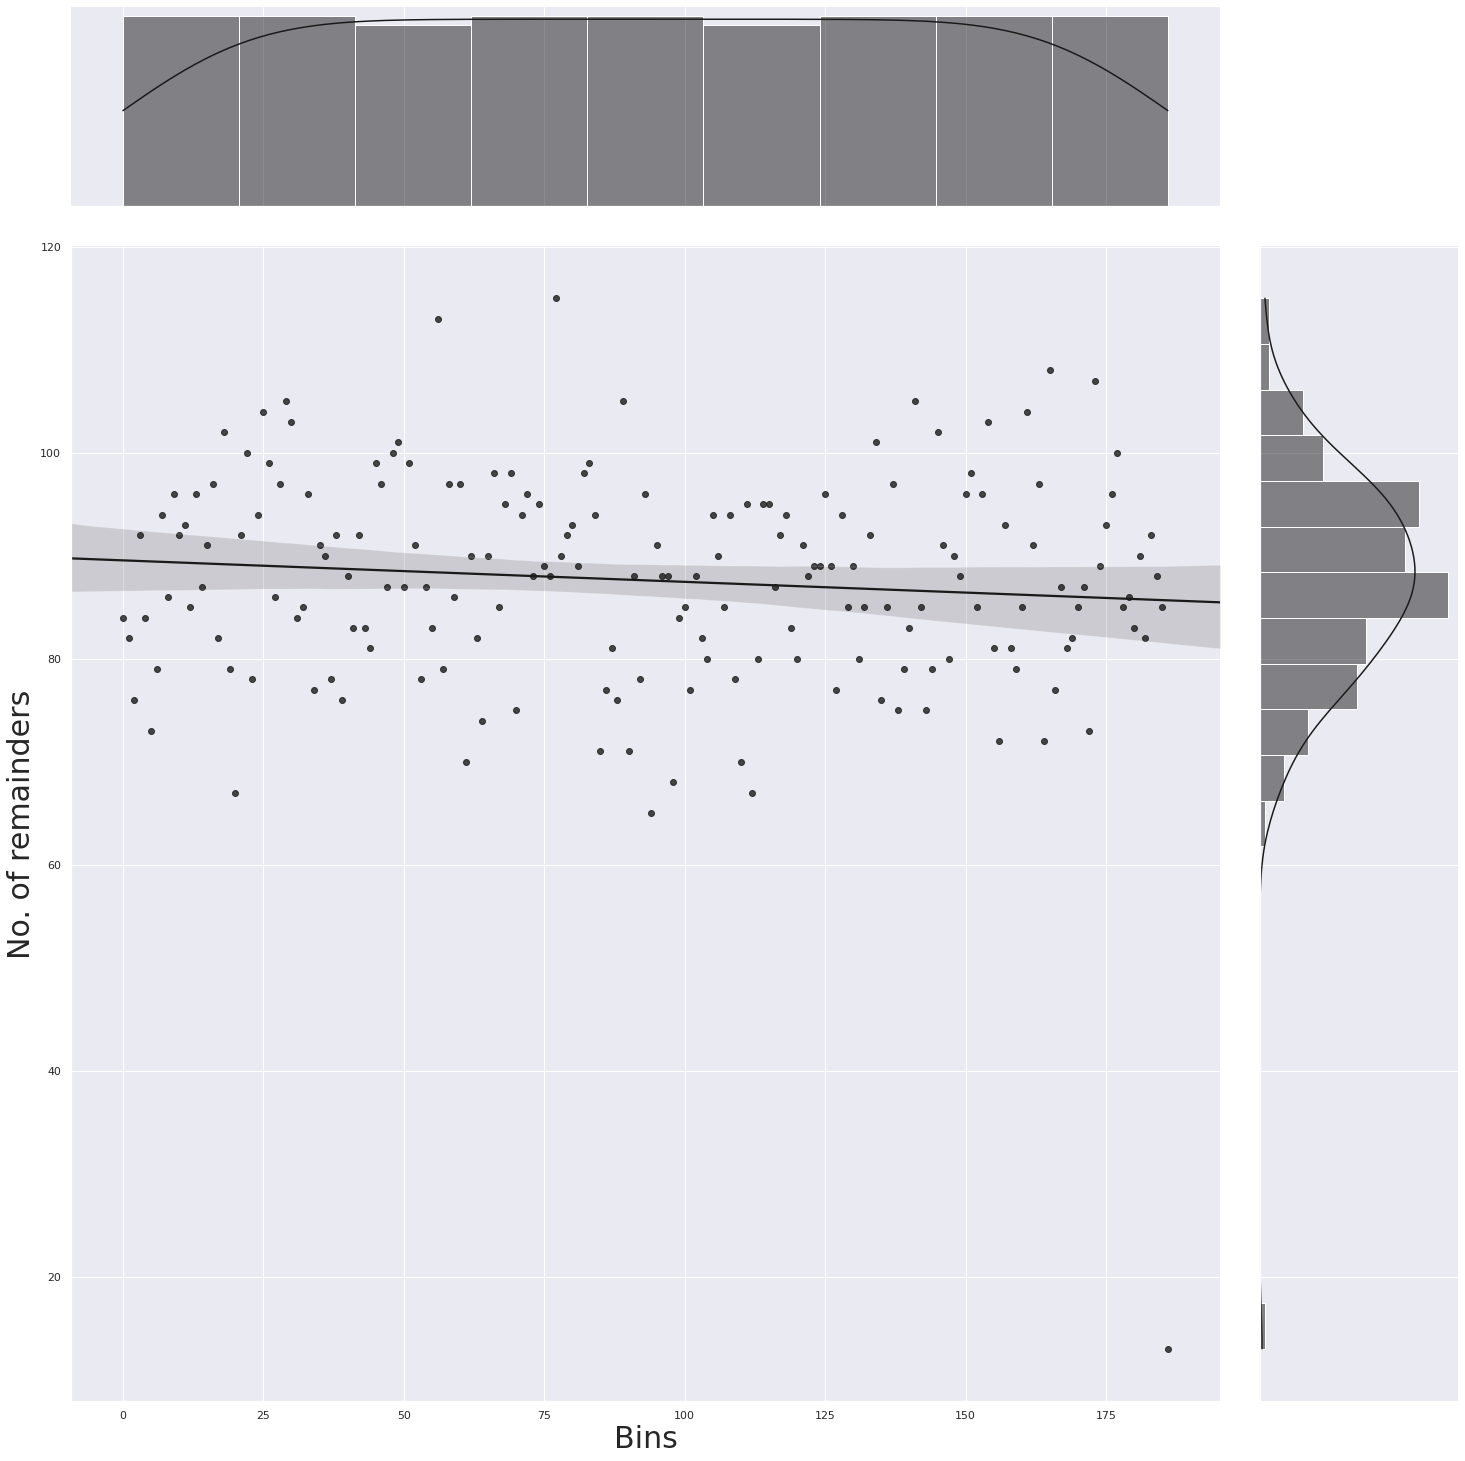

In [ ]:
bits = 2048
log2 = bits - 8
hp = fasthistprimer(primes[str(bits)], samples[str(bits)], log2)

sns.set_theme(style="darkgrid")
tips = hp
g = sns.jointplot(data=tips,
                  kind="reg", truncate=False,
                  color="k", height=20)
g.set_axis_labels('Bins', 'No. of remainders', fontsize = 30)

In [ ]:
bits = 3072
primes[str(bits)] = getbigrand(bits)
samples[str(bits)] = randrems(primes[str(bits)], 2**16)

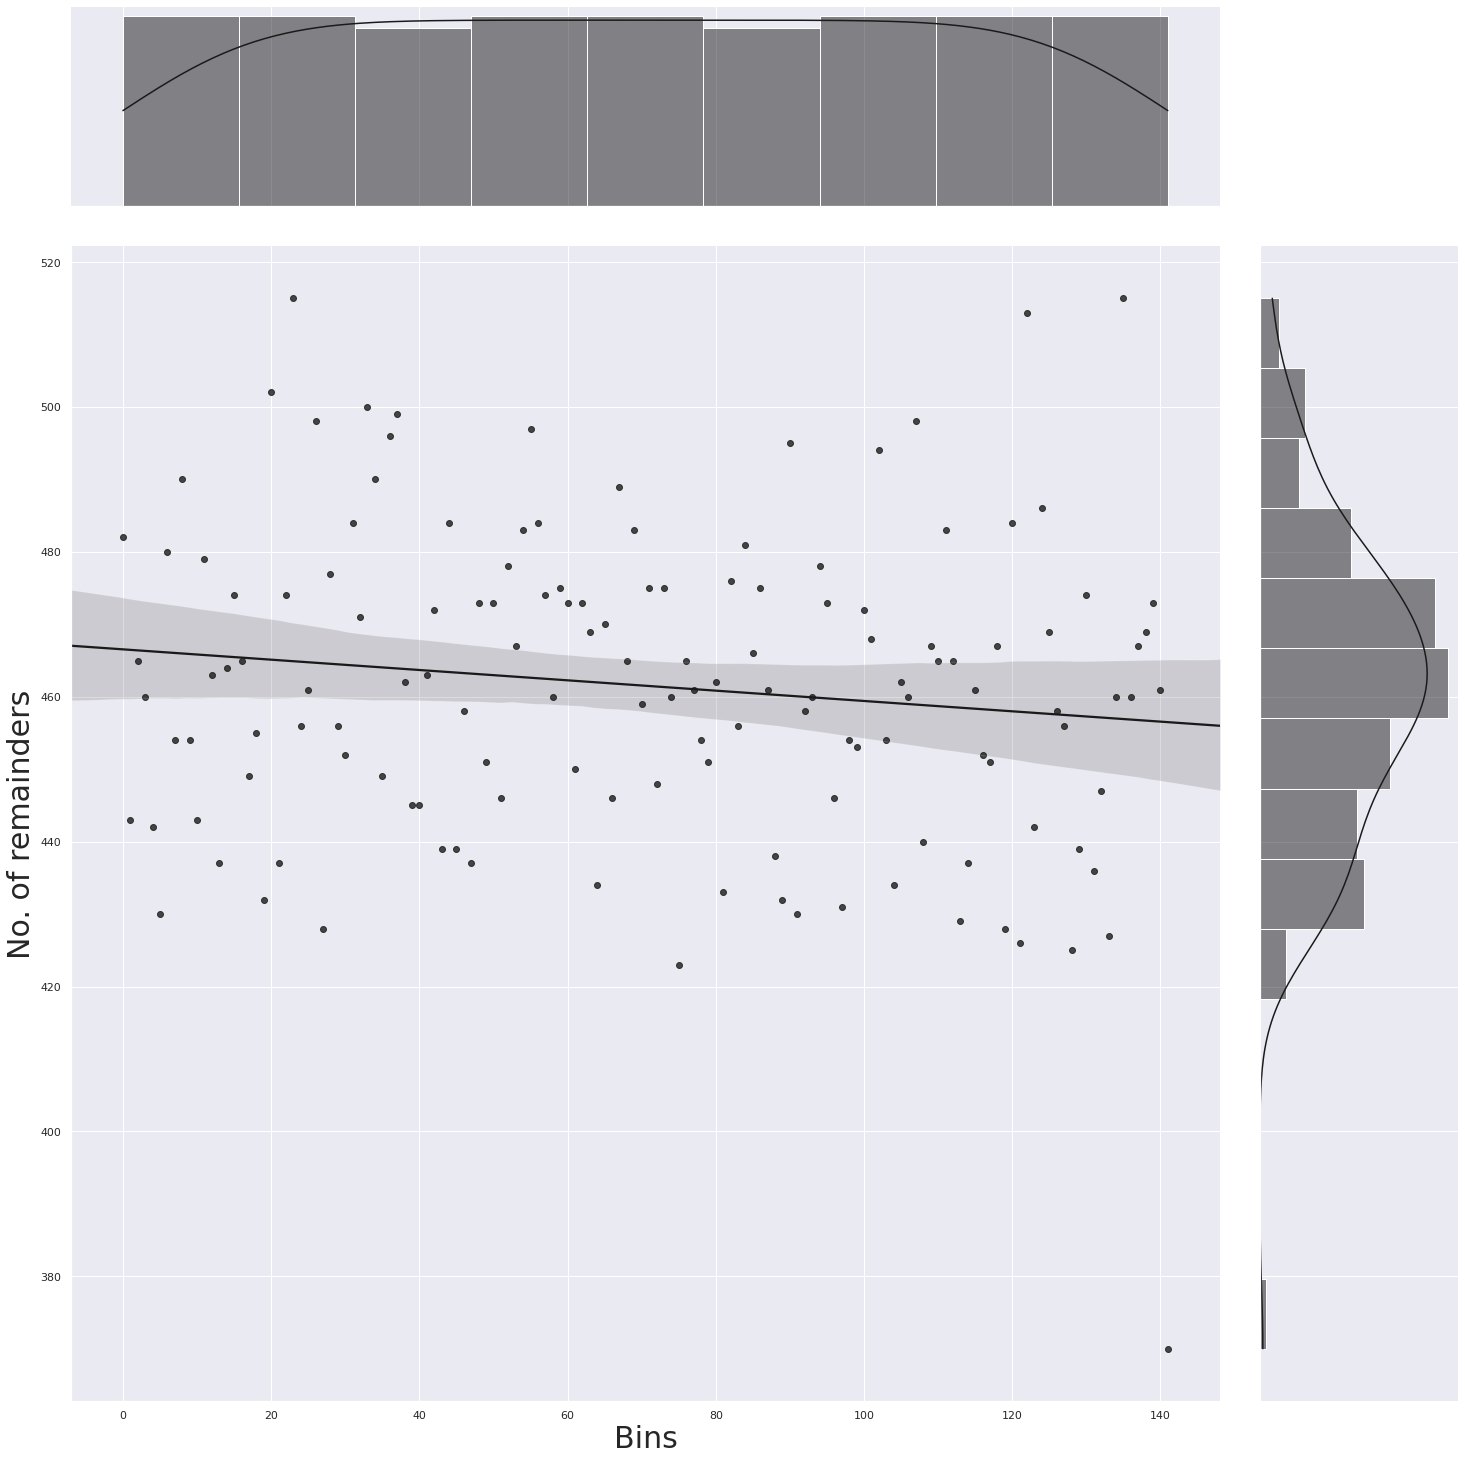

In [ ]:
bits = 3072
log2 = bits - 8
hp = fasthistprimer(primes[str(bits)], samples[str(bits)], log2)

sns.set_theme(style="darkgrid")
tips = hp
g = sns.jointplot(data=tips,
                  kind="reg", truncate=False,
                  color="k", height=20)
g.set_axis_labels('Bins', 'No. of remainders', fontsize = 30)


In [ ]:
bits = 4096
primes[str(bits)] = getbigrand(bits)
samples[str(bits)] = randrems(primes[str(bits)], 2**18)

##Generalization to all primes

In [ ]:
app_id = '647J4P-XQ42L9QPAG'
client = wolframalpha.Client(app_id)

In [ ]:
import re
import random
import math

"""
Generate prime numbers with the Miller-Rabin Primality Test.
For example useful for RSA prime number generation.
Generating a 2048 Bit Prime takes 11 seconds on my laptop:
    $ time python generate_primes.py
    18687035979164759960466760296206931684048670365627731168581812017856988830965115380270770738787389085718116283127416689537626499398221423941864131345832239438016468120676003896789194409913408615320990238865137075670115908902303929614757662667625835901714318363069492532318855874659498625458479795852690370922508203783115512849318748971370018698508809310655527728638519173556845950918379394995191185954569447143685450657088230510827375976211180471624026433253567874110992844598001397299587423215893037362024063057346321319865682948169846512354337641419160496824946523484362125933347273900485920490790844892064041256141 is prime with bitlength=2048
    real	0m11.099s
    user	0m11.068s
    sys	0m0.020s
"""

def fermat_primality_test(p, s=5):
    """
    a^(p-1) ≡ 1 mod p
    Input: prime candidate p and security paramter s
    Output: either p is a composite (always trues), or
            p is a prime (with probability)
    """
    if p == 2:
        return True
    if not p & 1: # if p is even, number cant be a prime
        return False

    for i in range(s):
        a = random.randrange(2, p-2)
        x = pow(a, p-1, p) # a**(p-1) % p
        if x != 1:
            return False
    return True

def square_and_multiply(x, k, p=None):
    """
    Square and Multiply Algorithm
    Parameters: positive integer x and integer exponent k,
                optional modulus p
    Returns: x**k or x**k mod p when p is given
    """
    b = bin(k).lstrip('0b')
    r = 1
    for i in b:
        r = r**2
        if i == '1':
            r = r * x
        if p:
            r %= p
    return r

def miller_rabin_primality_test(p, s=5):
    if p == 2: # 2 is the only prime that is even
        return True
    if not (p & 1): # n is a even number and can't be prime
        return False

    p1 = p - 1
    u = 0
    r = p1  # p-1 = 2**u * r

    while r % 2 == 0:
        r >>= 1
        u += 1

    # at this stage p-1 = 2**u * r  holds
    assert p-1 == 2**u * r

    def witness(a):
        """
        Returns: True, if there is a witness that p is not prime.
                False, when p might be prime
        """
        z = square_and_multiply(a, r, p)
        if z == 1:
            return False

        for i in range(u):
            z = square_and_multiply(a, 2**i * r, p)
            if z == p1:
                return False
        return True

    for j in range(s):
        a = random.randrange(2, p-2)
        if witness(a):
            return False

    return True

def generate_primes(n=512, k=1):
    """
    Generates prime numbers with bitlength n.
    Stops after the generation of k prime numbers.
    Caution: The numbers tested for primality start at
    a random place, but the tests are drawn with the integers
    following from the random start.
    """
    assert k > 0
    assert n > 0 and n < 4096

    # follows from the prime number theorem
    necessary_steps = math.floor( math.log(2**n) / 2 )
    # get n random bits as our first number to test for primality
    x = random.getrandbits(n)

    primes = []

    while k>0:
        if miller_rabin_primality_test(x, s=7):
            primes.append(x)
            k = k-1
        x = x+1

    return primes

In [ ]:
def gen_randrems(p, n):
    #Returns unoredered list of (r^i + i) for n random values of i

    #Could be optimized if the list of random values of i is ordered

    #Sorting array of such big numbers might not be efficient, so me might simply
    #generate a random difference D betweeen consequetive integers, with D < const
    #depending on number of remainders we want to generate
    count = []
    res = client.query(f'primitive root {p}')
    r = int(res['pod'][1]['subpod']['plaintext'].split(' ')[0])
    for i in range(n):
        exp = random.randrange(1, p)
        count.append(pow(r, exp, p))
    return count

In [ ]:
n = 256
p = generate_primes(n=n)

In [ ]:
p[0]

40519466793267430976563823282244076465966505202541152561193544131580889389297

In [ ]:
samplz = gen_randrems(primes[0], 2**20)

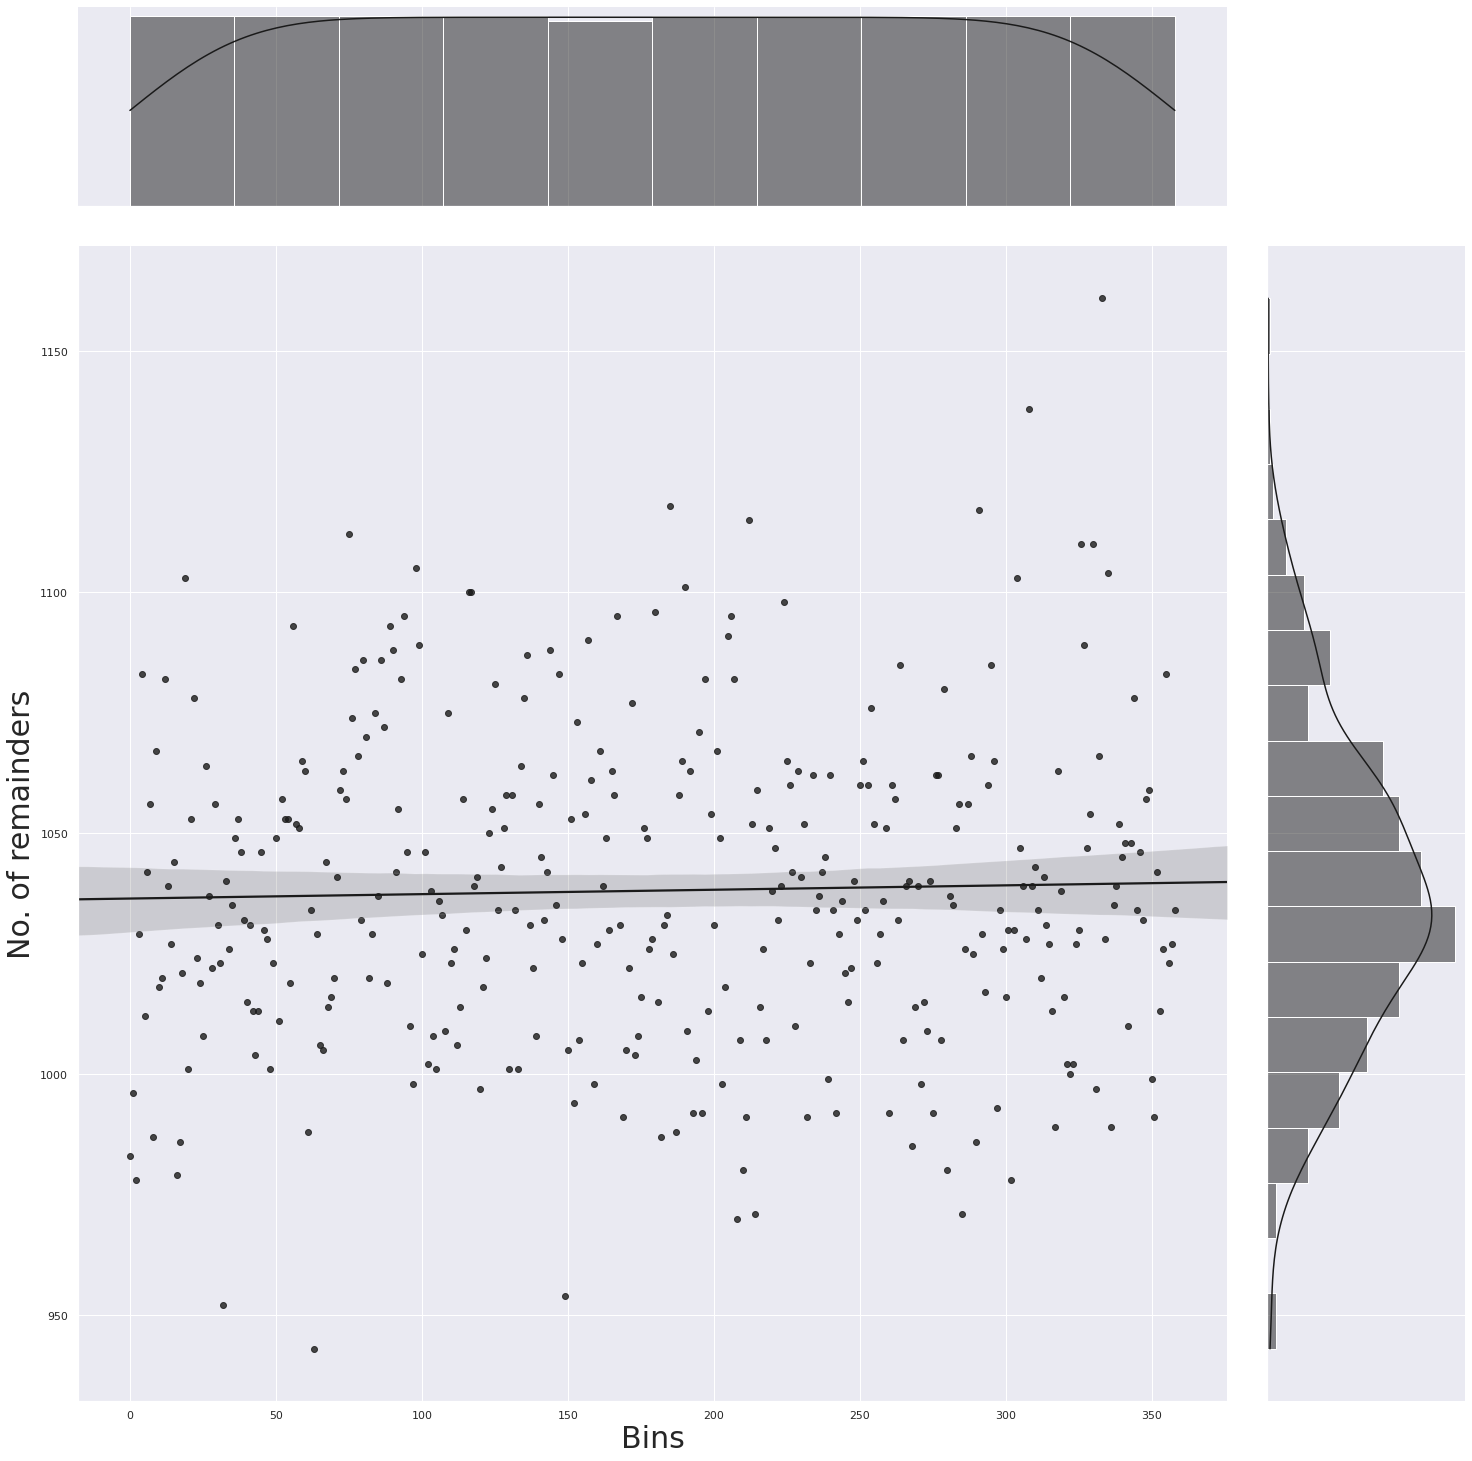

In [ ]:
bits = 256
log2 = bits - 10
hp = histprimer(p[0], samplz, log2)

sns.set_theme(style="darkgrid")
tips = hp
g = sns.jointplot(data=tips,
                  kind="reg", truncate=False,
                  color="k", height=20)
g.set_axis_labels('Bins', 'No. of remainders', fontsize = 30)